### Árbol de decisión 

In [ ]:
class sklearn.tree.DecisionTreeClassifier:
    # hiperparametros son aquellos que no tenemos que ajustar a fuerzas jaja 
    """
    Decision Tree Classifier.

    Parameters
    ----------
    criterion : str, default="gini"
        The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

    max_depth : int, default=None va dejar que crezca lo más mas posible eso ees que sea none es un número entero es la máxima profundidad que puede llegar el árbol 
        The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

    min_samples_split : int or float, default=2 es el número mínimo de muestras que se requieren para dividir un nodo interno.
        The minimum number of samples required to split an internal node. If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

    min_samples_leaf : int or float, default=1
        The minimum number of samples required to be at a leaf node. If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

    max_features : int, float, str or None, default=None
        The number of features to consider when looking for the best split. If int, then consider max_features features at each split. If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split. If "sqrt", then max_features=sqrt(n_features). If "log2", then max_features=log2(n_features). If None, then max_features=n_features.

    random_state : int, RandomState instance or None, default=None
        Controls the randomness of the estimator. The features are always randomly permuted at each split regardless of random_state. When random_state is None, the random number generator is the RandomState instance used by np.random.

    max_leaf_nodes : int or None, default=None
        Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.

    min_impurity_decrease : float, default=0.0
        A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    splitter : str, default="best"
        The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.
    
    entonces con los hiperparametros max_depth y min_samples_split es con lo que vamos a modificar el árbol 
    """
    Attributes
    ----------
    feature_importances_ : ndarray of shape (n_features,)
        The feature importances (the higher,

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split



In [2]:
path = r"/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/SEXTO/MODELOS2/Neurociencias-2025-2/S03_datasets/iris/iris.csv"
df = pd.read_csv(path)


In [3]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]


In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion = "entropy", random_state=99)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=99)

[Text(0.5, 0.9166666666666666, 'Petal.Length <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'Petal.Width <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'Petal.Length <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'Petal.Width <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'Petal.Width <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.384615384

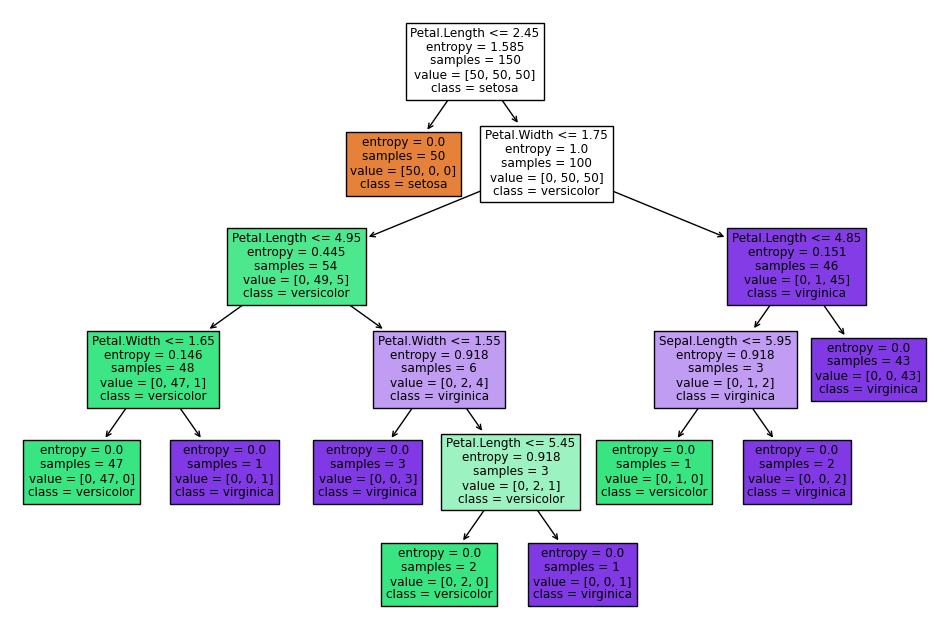

In [5]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=df['Species'].unique())

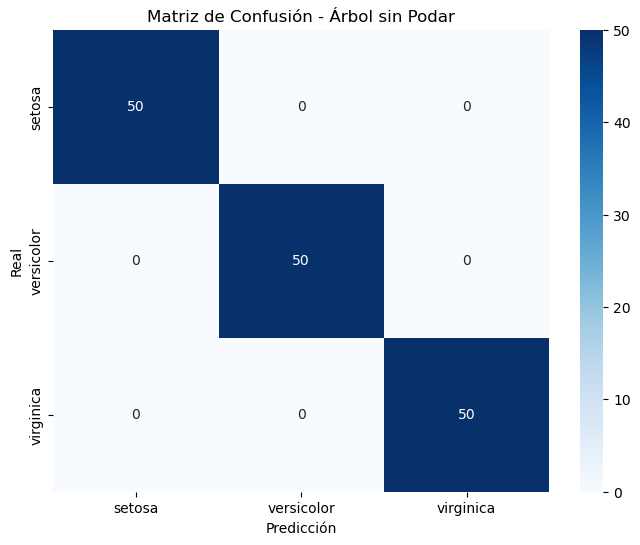

In [16]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Matriz de Confusión - Árbol sin Podar")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

modificar parametros. llevarlo hasta 3 divisiones y calcular accuracy y matriz de confusión 

In [6]:
# si ya sabemos que es un arbol sobreajustado vamos a observarlo 
# aqui le dimos todos los datos para entrenar entonces si te los iba a clasificar bien 
observado = clf.predict(X)
pd.crosstab(y, observado)

col_0,setosa,versicolor,virginica
Species,,,
setosa,50,0,0
versicolor,0,50,0
virginica,0,0,50


[Text(0.375, 0.875, 'Petal.Length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'Petal.Width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.25, 0.375, 'Petal.Length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'Petal.Length <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = virginica')]

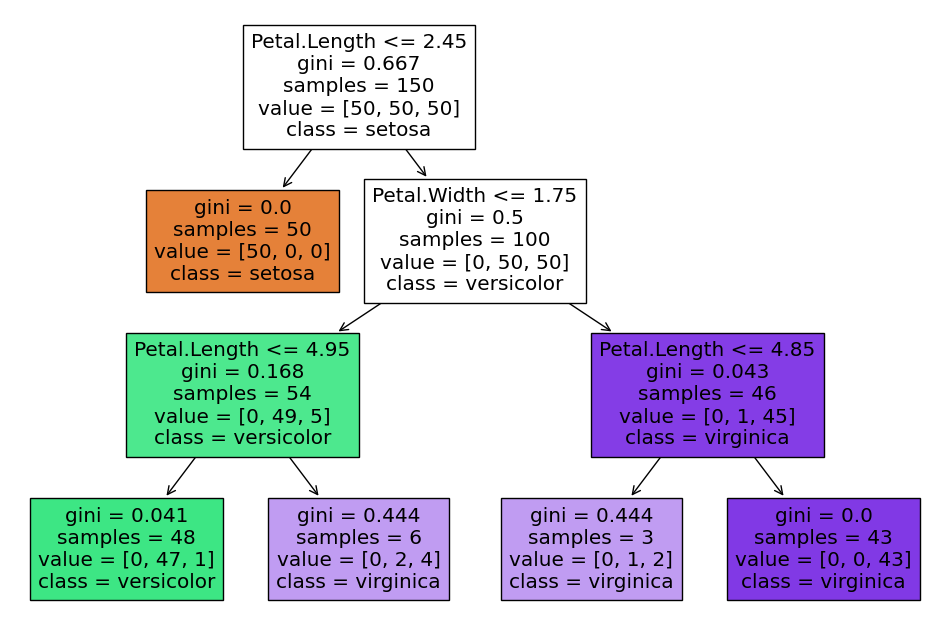

In [13]:
clf_podado = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_podado.fit(X, y)
y_pred_podado = clf_podado.predict(X)
plt.figure(figsize=(12, 8))
plot_tree(clf_podado, max_depth=3, filled=True, feature_names=df.columns[:-1], class_names=df['Species'].unique())


In [14]:
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


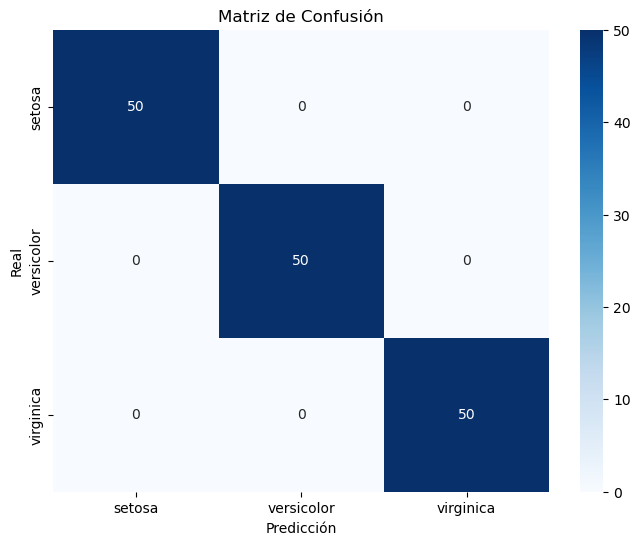

In [15]:

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()